# Iterating and conditionals

This is a brief survey in ways that you might use iterations and control flow, like `for` loops and `if` statements. 

For a review of the tools at your disposal, read [More control flow tools](https://docs.python.org/3/tutorial/controlflow.html) in the Python docs.

In [1]:
import pandas as pd

# `for` loops

In [2]:
nums = [1,2,3,4]

for number in nums:
    print(number + 1)

2
3
4
5


In [3]:
words = pd.read_csv("word_cloud_counts.csv")
word_list = words['Text'].tolist()
print(word_list[0:4])

['Water', 'Flow', 'Soil', 'Hillslope']


## Mini-assignment 1

Use a `for` loop and the built-in method [`.lower()`](https://docs.python.org/3/library/stdtypes.html#str.lower) to iterate through the list of features and make a new word list with lowercase words.

In [4]:
# Your code here
lower_word_list= []
for word in word_list:
   lower_word_list.append(word.lower())
print(lower_word_list[0:4])

['water', 'flow', 'soil', 'hillslope']


# `enumerate`

`enumerate` returns a tuple with the counts and items in the iterable (like a list)

Here I am taking advantage of [string formatted literals](https://docs.python.org/3/tutorial/inputoutput.html) - basically the `f'{variable}'` format lets you print words and variables together! 

In [5]:
for i, word in enumerate(['sedimentary','igneous','metamorphic']):
    # strings and variables living in harmony
    print(f'Rock number {i+1} is {word}')

Rock number 1 is sedimentary
Rock number 2 is igneous
Rock number 3 is metamorphic


# List comprehension

List comprehension is a compact `for` loop if you want your results in a list (rather than, say, iterating with math or something)

In [6]:
[s.lower() for s in word_list][0:4]

['water', 'flow', 'soil', 'hillslope']

In this case:
- `s`: Represents each item in the original word_list.
- `.lower()`: A string method that converts each item (each `s`) to lowercase.
- `for s in word_list`: Loops through all elements in the original list.

# Doing functions with `for` loop items

Here I am using the incredible [`glob`](https://docs.python.org/3/library/glob.html)

In [7]:
from pathlib import Path

p = Path("./upper_kuparuk_data")

for file in p.glob('wt*.csv'):
    print(file)


upper_kuparuk_data/wt1.csv
upper_kuparuk_data/wt2.csv
upper_kuparuk_data/wt3.csv
upper_kuparuk_data/wt4.csv
upper_kuparuk_data/wt5.csv
upper_kuparuk_data/wt6.csv


Once you have created a `for` loop with a `glob` generator object, you can treat it like any other file, variable, etc. 

In [8]:
for file in p.glob('wt*.csv'):
    df = pd.read_csv(file)
    print(file.stem, list(df.columns))

wt1 ['TIMESTAMP', 'in_2', 'in_4', 'in_6', 'in_8', 'in_10', 'in_15', 'in_20', 'in_25', 'in_30', 'in_35', 'edge_2', 'edge_4', 'edge_6', 'edge_8', 'edge_10', 'edge_15', 'edge_20', 'edge_25', 'edge_30', 'edge_35', 'out_2', 'out_4', 'out_6', 'out_8', 'out_10', 'out_15', 'out_20', 'out_25', 'out_30', 'out_35']
wt2 ['TIMESTAMP', 'in_2', 'in_4', 'in_6', 'in_8', 'in_10', 'in_15', 'in_20', 'in_25', 'in_30', 'in_35', 'edge_2', 'edge_4', 'edge_6', 'edge_8', 'edge_10', 'edge_15', 'edge_20', 'edge_25', 'edge_30', 'edge_35', 'out_2', 'out_4', 'out_6', 'out_8', 'out_10', 'out_15', 'out_20', 'out_25', 'out_30', 'out_35']
wt3 ['TIMESTAMP', 'in_2', 'in_4', 'in_6', 'in_8', 'in_10', 'in_15', 'in_20', 'in_25', 'in_30', 'in_35', 'edge_2', 'edge_4', 'edge_6', 'edge_8', 'edge_10', 'edge_15', 'edge_20', 'edge_25', 'edge_30', 'edge_35', 'out_2', 'out_4', 'out_6', 'out_8', 'out_10', 'out_15', 'out_20', 'out_25', 'out_30', 'out_35']
wt4 ['TIMESTAMP', 'in_2', 'in_4', 'in_6', 'in_8', 'in_10', 'in_15', 'in_20', 'in_2

Instead of opening each file by hand, we can quickly see which years we have data for and which ones we don't:

In [9]:
for file in p.glob('wt*.csv'):
    df = pd.read_csv(file)
    df['time'] = pd.to_datetime(df['TIMESTAMP'],format="%m/%d/%y %H:%M")
    df.index = df['time']
    latest_date = df['time'].max()
    if latest_date.year < 2015:
        print (f'{file} only goes to {latest_date.year}:(')
    else:
        print (f'{file} goes to {latest_date.year}, hooray!')

upper_kuparuk_data/wt1.csv only goes to 2013:(
upper_kuparuk_data/wt2.csv only goes to 2014:(
upper_kuparuk_data/wt3.csv goes to 2015, hooray!
upper_kuparuk_data/wt4.csv goes to 2015, hooray!
upper_kuparuk_data/wt5.csv goes to 2015, hooray!
upper_kuparuk_data/wt6.csv goes to 2015, hooray!


## Mini-assignment 2

Write a for loop that (1) globs the water track files, (2) parses the latest date for each file, and (3) only plots the data in column `in_35` if the data goes until 2015. As a challenge, see if you can label it with the right water track!

upper_kuparuk_data/wt1.csv only goes to 2013
upper_kuparuk_data/wt2.csv only goes to 2014


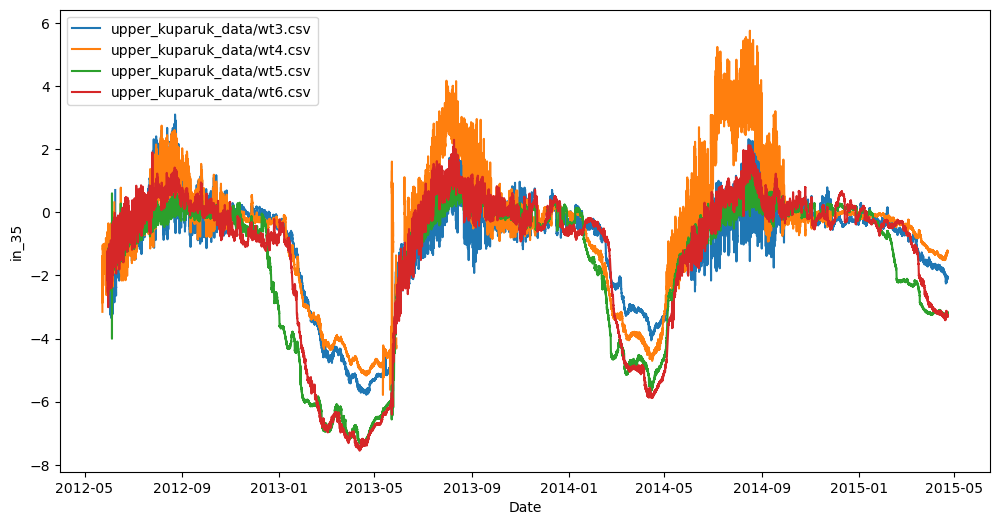

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
for file in p.glob('wt*.csv'):
    df = pd.read_csv(file)
    df['time'] = pd.to_datetime(df['TIMESTAMP'],format="%m/%d/%y %H:%M")
    df.index = df['time']
    latest_date = df['time'].max()
    if latest_date.year == 2015:
        ax.plot(df['time'], df['in_35'], label=file)
    else:
        print(f'{file} only goes to {latest_date.year}')
   
ax.set_xlabel('Date')
ax.set_ylabel('in_35')
ax.legend()
# Your code here


# `while` loops

like `for` loops but with no end. Technically can run forever and ever, until their stopping condition is met. 

In [13]:
i = 0
while i<4:
    print(i)
    i += 1 # shorthand for i = i + 1


0
1
2
3


In [14]:
i = 5
while i: # shorthand for while i != 0
    print('howdy again')
    i -= 1 # shorthand for i = i - 1

howdy again
howdy again
howdy again
howdy again
howdy again


In [15]:
i = 0
while 3:
    print(i)
    i += 2
    if i > 10:
        break

0
2
4
6
8
10


## Mini-assignment 3

Use a `while` loop to fill a model bucket with a `total_bucket_volume` of some volume with water drops of a certain volume, and then turn off the faucet (exit the loop) when the bucket is full. At the end, print the number of drips needed to fill the bucket. 

In [16]:
total_bucket_volume = 0
drip_volume = 2.5

drip_count = 0
current_bucket_volume = 0

while current_bucket_volume < 100:
    current_bucket_volume += drip_volume
    drip_count += 1
print(drip_count)

40
